Notes:
    


In [1]:
import tensorflow as tf
import lib.data_loader as data_loader
import lib.plot_learning_curves as plot_learning_curves
import models.base_model as base_model
import models.densenet as densenet
import models.resnet as resnet
import models.inception_v3 as inception
import models.xception as xception
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math
import matplotlib.image as mpimg
# from tqdm import tqdm
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import random, os
import numpy as np
import pandas as pd
import json

# import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from glob import glob
import gc
# from skimage.transform import resize
from tensorflow.keras import backend as K # Importing Keras backend (by default it is Tensorflow)
from tensorflow.keras.layers import Input, Conv2D, Dense, Dropout, Flatten, MaxPool2D # Layers to be used for building our model
from tensorflow.keras.models import Model # The class used to create a model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.random import set_seed

from sklearn.metrics import f1_score, recall_score, precision_score

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
! pip install -q -U keras-tuner
import keras_tuner as kt

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
print("Tensorflow version " + tf.__version__)

Tensorflow version 2.4.0
Train model
Tensorflow version 2.4.0
Tensorflow version 2.4.0
Tensorflow version 2.4.0
Tensorflow version 2.4.0
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Tensorflow version 2.4.0


In [2]:
# mount data
data_path = 'data/MURA-v1.1/'
directory = 'data/'
! pwd
train_generators, valid_generators, test_generators, test=data_loader.load_all("deep_augment")

/tf

Import train and test data

Doing a light data augmentation

Create training, validation and test set

Found 32984 validated image filenames.
Found 3824 validated image filenames.
Found 3197 validated image filenames.
Data munging completed


# DenseNet

In [3]:
def clean_up(model):
    K.clear_session()
    del model
    gc.collect()

In [4]:
bodypart = '14classes'
# for bodypart in bodyparts:
print(bodypart)
print("\nBuild model\n")
model =  densenet.build_model_on_densenet_14classes()
print('\nTrain model\n')
print(bodypart)
densenet_model_top_histories = densenet.train_model_14classes(model, 
                                                 valid_generators,
                                                 train_generators,
                                                 50)
print('\nSave training history\n')
with open("data/history/history_densenet_14classes_top_50epochs_deep_augment_fixed_softmax.json", "w") as file:
    json.dump(densenet_model_top_histories.history, file)
    print('\nSave model\n')
model.save("data/models/densenet_14classes_top_50epochs_deep_augment_fixed_softmax")
model.save("data/models/densenet_14classes_top_50epochs_deep_augment_fixed_softmax.h5")

14classes

Build model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 320, 320, 3)]     0         
_________________________________________________________________
densenet121 (Functional)     (None, 10, 10, 1024)      7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 14)                14350     
Total params: 7,051,854
Trainable params: 14,350
Non-trainable params: 7,037,504
_________________________________________________________________

Train model

14classes
Using validation_steps = 15
Using steps_per_epoch = 65


/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
65/65 [==============================] - 272s 4s/step - loss: 2.5580 - accuracy: 0.1673 - val_loss: 1.8732 - val_accuracy: 0.3875
Epoch 2/50
65/65 [==============================] - 200s 3s/step - loss: 1.9877 - accuracy: 0.3202 - val_loss: 1.5867 - val_accuracy: 0.4833
Epoch 3/50
65/65 [==============================] - 202s 3s/step - loss: 1.7738 - accuracy: 0.3853 - val_loss: 1.5029 - val_accuracy: 0.4750
Epoch 4/50
65/65 [==============================] - 208s 3s/step - loss: 1.6605 - accuracy: 0.4372 - val_loss: 1.3164 - val_accuracy: 0.5688
Epoch 5/50
65/65 [==============================] - 237s 4s/step - loss: 1.4250 - accuracy: 0.5151 - val_loss: 1.3018 - val_accuracy: 0.5479
Epoch 6/50
65/65 [==============================] - 230s 4s/step - loss: 1.4201 - accuracy: 0.4984 - val_loss: 1.2475 - val_accuracy: 0.5479
Epoch 7/50
65/65 [==============================] - 257s 4s/step - loss: 1.3876 - accuracy: 0.5377 - val_loss: 1.2051 - val_accuracy: 0.5583
Epoch 8/50
65

In [5]:
# print('\nEvaluate model\n')
# # load model
# model = tf.keras.models.load_model('data/models/densenet_14classes_top_50epochs_deep_augment.h5')

# model.summary()

In [6]:
model.evaluate(test_generators, verbose=1)

100/100 [==============================] - 343s 3s/step - loss: 1.0315 - accuracy: 0.6090


[1.0314987897872925, 0.6090084314346313]

In [7]:
model.evaluate(train_generators, verbose=1)

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1031/1031 [==============================] - 3158s 3s/step - loss: 0.9484 - accuracy: 0.6473


[0.9484333395957947, 0.647344172000885]

In [8]:
model.evaluate(valid_generators, verbose=1)

120/120 [==============================] - 325s 3s/step - loss: 0.9366 - accuracy: 0.6540


[0.9366335868835449, 0.6540272235870361]

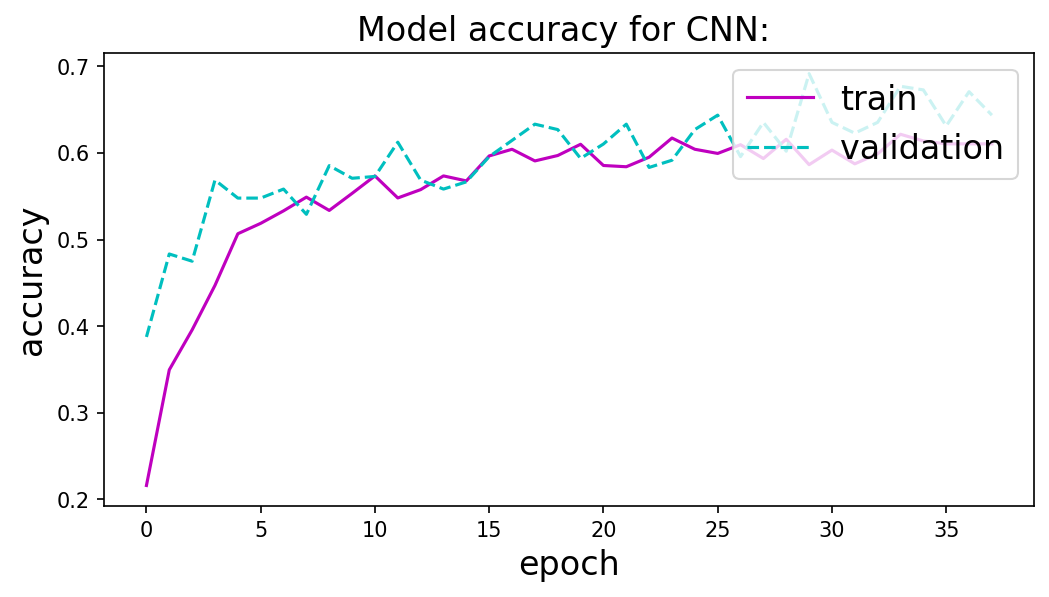

<Figure size 432x288 with 0 Axes>

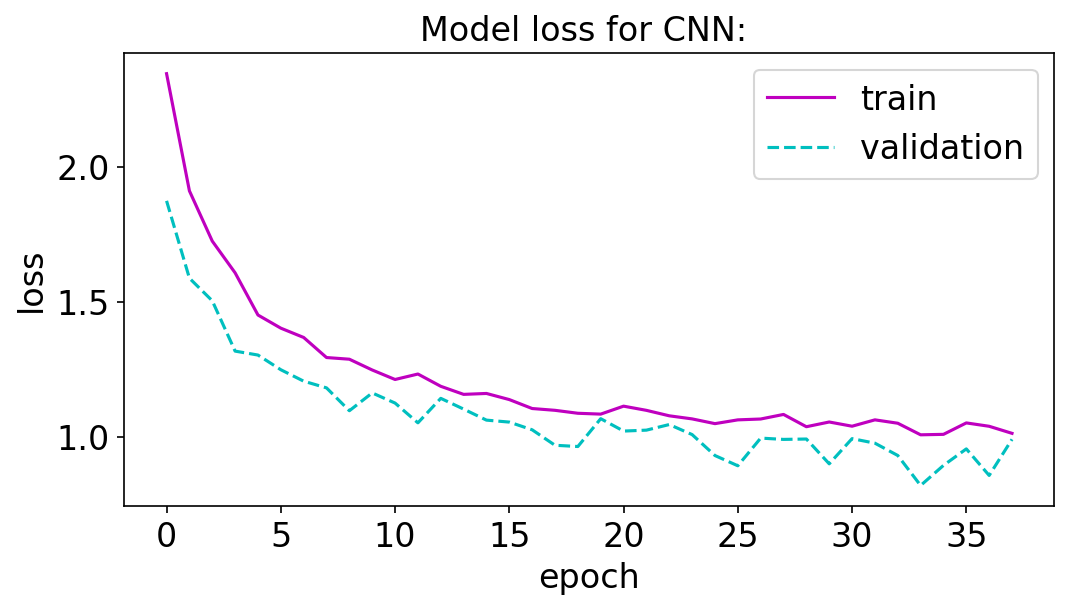

<Figure size 432x288 with 0 Axes>

In [9]:
plot_learning_curves.plot_history_all(densenet_model_top_histories, 
                                         'densenet_14classes_model_top_fixed_softmax',
                                 50,
                                 data_augmentation='deep_augment')